<h2>Previsão de Vendas</h2>

- Previsão de vendas em um determinado período, com base nos gastos com anúncios nas três grandes redes que a empresa investe: TV, jornal e Rádio.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [14]:
# importar base de dados
df = pd.read_csv("advertising.csv")

In [15]:
# mostrar as 5 primeiras entradas da base de dados
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
print("Variáveis:\t {:>5}".format(df.shape[1]))
print("Entradas:\t {:>5}".format(df.shape[0]))

Variáveis:	     4
Entradas:	   200


In [17]:
# tipos de dados existentes na base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


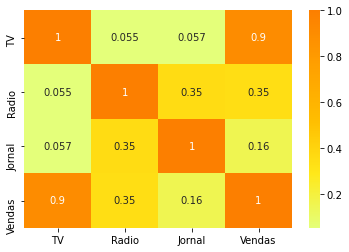

In [29]:
# demonstração gráfica da correlação entre as variáveis
sns.heatmap(df.corr(), annot=True, cmap="Wistia")

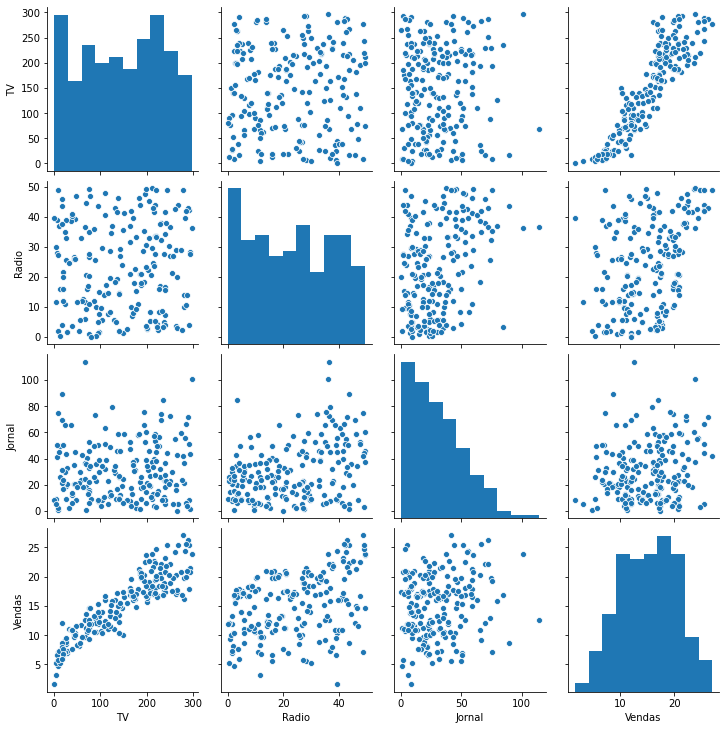

In [30]:
sns.pairplot(df)

In [37]:
# separar dados de treino e teste
y = df["Vendas"]
x = df[["TV", "Radio", "Jornal"]]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [41]:
# criar os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

In [43]:
# treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [49]:
# fazer previsão
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar modelos
print("Regressão Linear:\t {:.2f}".format(metrics.r2_score(y_teste, previsao_regressaolinear)))
print("Árvore de decisão:\t {:.2f}".format(metrics.r2_score(y_teste, previsao_arvoredecisao)))


Regressão Linear:	 0.94
Árvore de decisão:	 0.98


In [50]:
# demonstração das previsões
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["Y_TESTE"] = y_teste
tabela_auxiliar["PREVISAO ARVORE"] = previsao_arvoredecisao
tabela_auxiliar["PREVISAO REGRESSAO"] = previsao_regressaolinear

tabela_auxiliar


,Y_TESTE,PREVISAO ARVORE,PREVISAO REGRESSAO
17,24.4,22.590,24.085785
176,20.2,19.706,21.336553
193,19.6,19.880,18.221071
161,13.3,13.913,13.127498
50,16.4,16.529,15.787354
125,10.6,11.507,10.657327
98,25.4,25.504,24.828849
7,13.2,12.609,13.291844
164,11.9,12.255,12.610786
65,11.3,10.927,9.435631


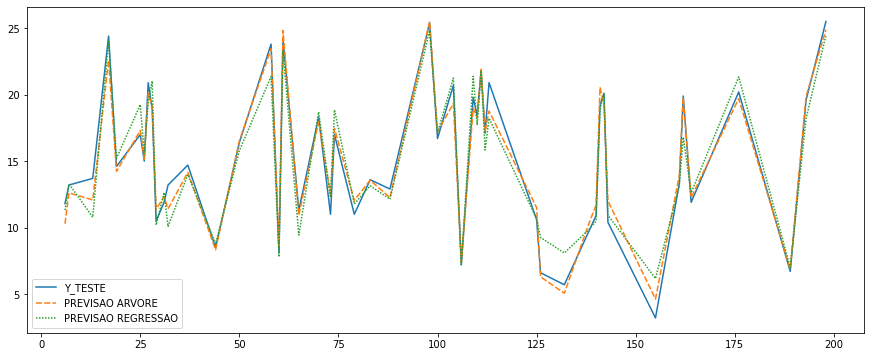

In [56]:
# Representação gráfica das previsoes
plt.figure(figsize=(15, 6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

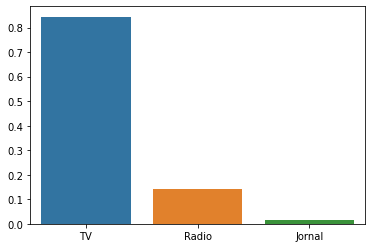

In [59]:
# Demonstração gráfica do grau de importância de cada variável para as vendas
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)

<h2>Conclusão</h2>

- De acordo com a análise dos dados, o investimento em anúncios para a TV tem a maior influência no valor das vendas. 